In [2]:
from numpy import random   
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data = pd.read_csv('/Users/jesshuang/Documents/GitHub/jess_project/世界「快樂」專案/World Happiness Report.csv')
data.head(10)

,Region,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Central and Eastern Europe,5.545403,9.967572,0.855679,66.942756,0.685011,-0.080101,0.870915,0.580565,0.265372,0.308775
1,Commonwealth of Independent States,5.233690,9.262200,0.831078,63.012101,0.712926,-0.096158,0.770349,0.567455,0.228137,0.515145
2,East Asia,5.671978,10.178492,0.852248,68.323897,0.750306,-0.026965,0.716628,0.636781,0.183525,0.361518
3,Latin America and Caribbean,5.998131,9.347562,0.850018,64.945436,0.783928,-0.037772,0.784512,0.761236,0.290321,0.390210
4,Middle East and North Africa,5.416164,9.770167,0.784448,65.225196,0.698465,-0.056655,0.768676,0.572679,0.333301,0.448023
5,North America and ANZ,7.228132,10.775491,0.937928,69.472121,0.896855,0.224726,0.452713,0.763898,0.234539,0.516238
6,South Asia,4.480511,8.392222,0.647216,59.394485,0.693706,0.067446,0.807924,0.538186,0.302060,0.586583
7,Southeast Asia,5.355767,9.241028,0.807693,63.930151,0.865330,0.202973,0.738463,0.716258,0.255863,0.743751
8,Sub-Saharan Africa,4.317410,8.002588,0.705686,53.960869,0.703013,-0.004289,0.787978,0.651304,0.282840,0.560125
9,Western Europe,6.858845,10.788217,0.917785,70.869472,0.845660,0.069389,0.558510,0.708192,0.242520,0.487140


In [ ]:
data.describe

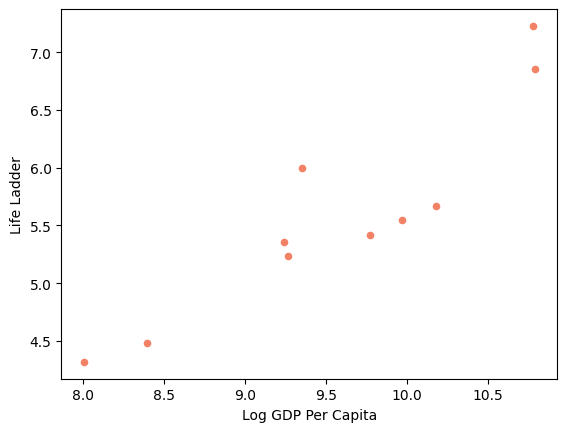

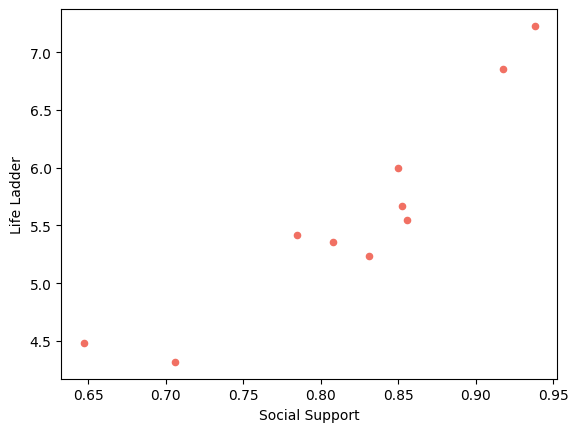

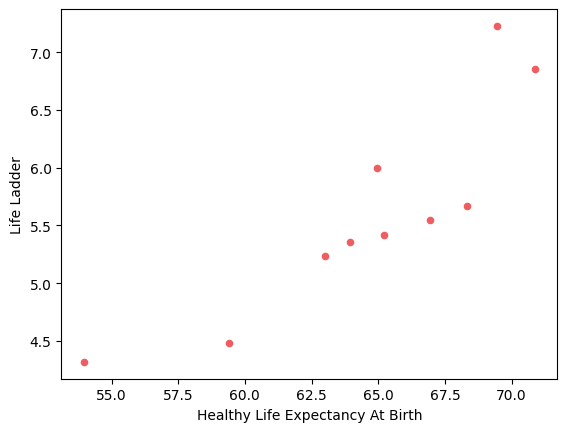

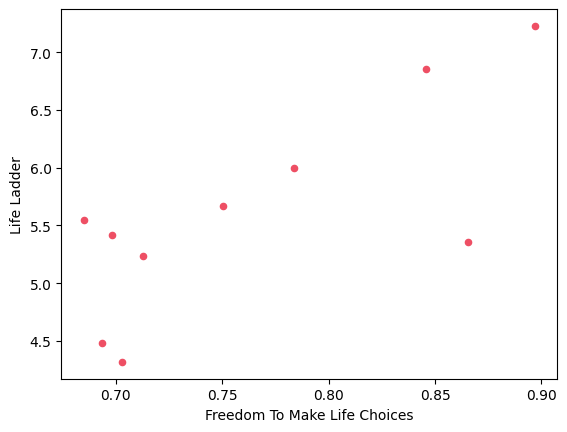

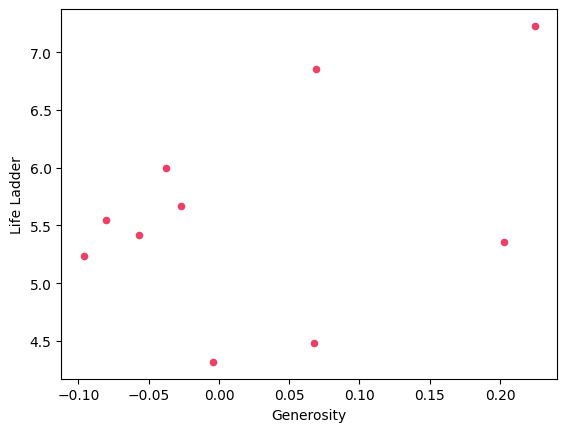

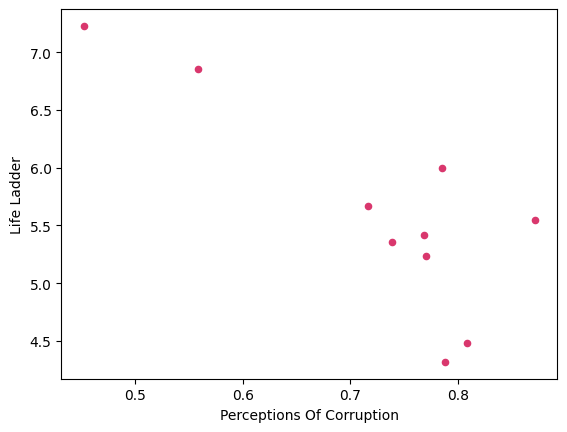

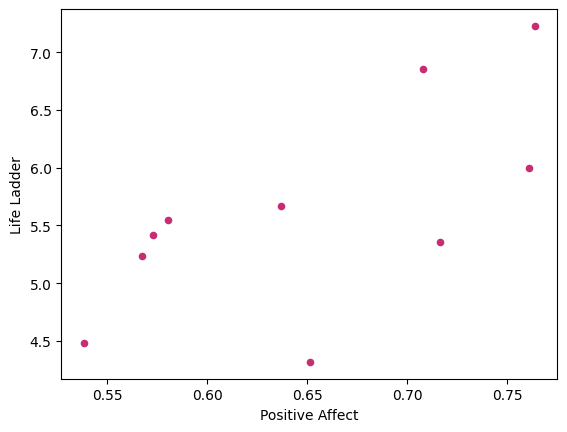

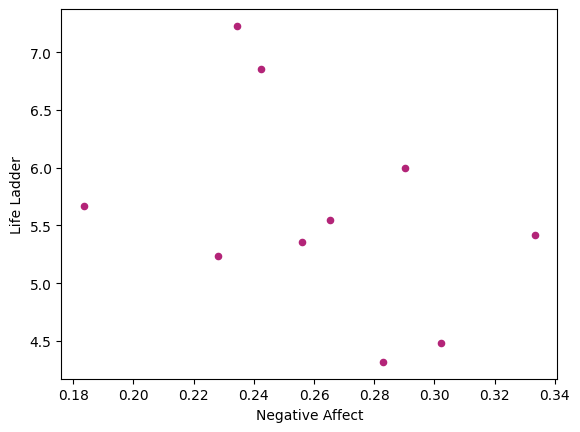

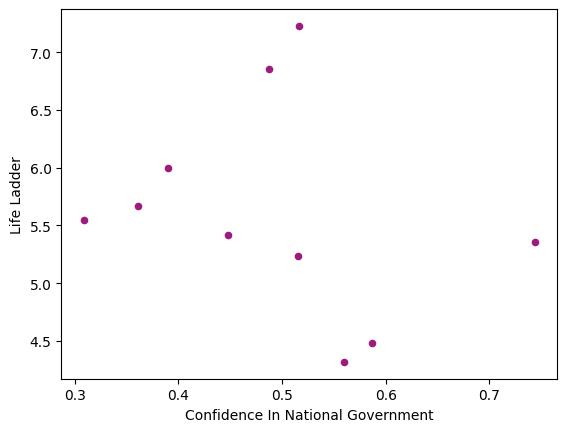

In [25]:
sp_gdp = data.plot.scatter(y='Life Ladder', x='Log GDP Per Capita', color='#f28266')
sp_support = data.plot.scatter(y='Life Ladder', x='Social Support', color='#f17063')
sp_health = data.plot.scatter(y='Life Ladder', x='Healthy Life Expectancy At Birth', color='#ef5d60')
sp_freedom = data.plot.scatter(y='Life Ladder', x='Freedom To Make Life Choices', color='#ee4f64')
sp_generosity = data.plot.scatter(y='Life Ladder', x='Generosity', color='#ec4067')
sp_corruption = data.plot.scatter(y='Life Ladder', x='Perceptions Of Corruption', color='#d9376d')
sp_positivity = data.plot.scatter(y='Life Ladder', x='Positive Affect', color='#c62d72')
sp_negativity = data.plot.scatter(y='Life Ladder', x='Negative Affect', color='#b32478')
sp_gov = data.plot.scatter(y='Life Ladder', x='Confidence In National Government', color='#a01a7d')

                                     



In [23]:
mean_data = data.groupby('Region')['Life Ladder'].mean() \
    .reset_index() \
    .sort_values(by='Life Ladder', ascending=False) \
    .reset_index(drop=True)
top, bottom = mean_data[:15], mean_data[-15:]
mean_data = pd.concat([top,bottom]).reset_index(drop=True)

regional_score = data.groupby('Region')[['Life Ladder', 'Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption', 'Confidence In National Government']].mean().sort_values(by='Life Ladder', ascending=False).reset_index()

mean_data

,Region,Life Ladder
0,North America and ANZ,7.228132
1,Western Europe,6.858845
2,Latin America and Caribbean,5.998131
3,East Asia,5.671978
4,Central and Eastern Europe,5.545403
5,Middle East and North Africa,5.416164
6,Southeast Asia,5.355767
7,Commonwealth of Independent States,5.233690
8,South Asia,4.480511
9,Sub-Saharan Africa,4.317410


/var/folders/z_/tp2bb4193xgdzr3fvyjyr6zm0000gn/T/ipykernel_93586/3164969990.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)


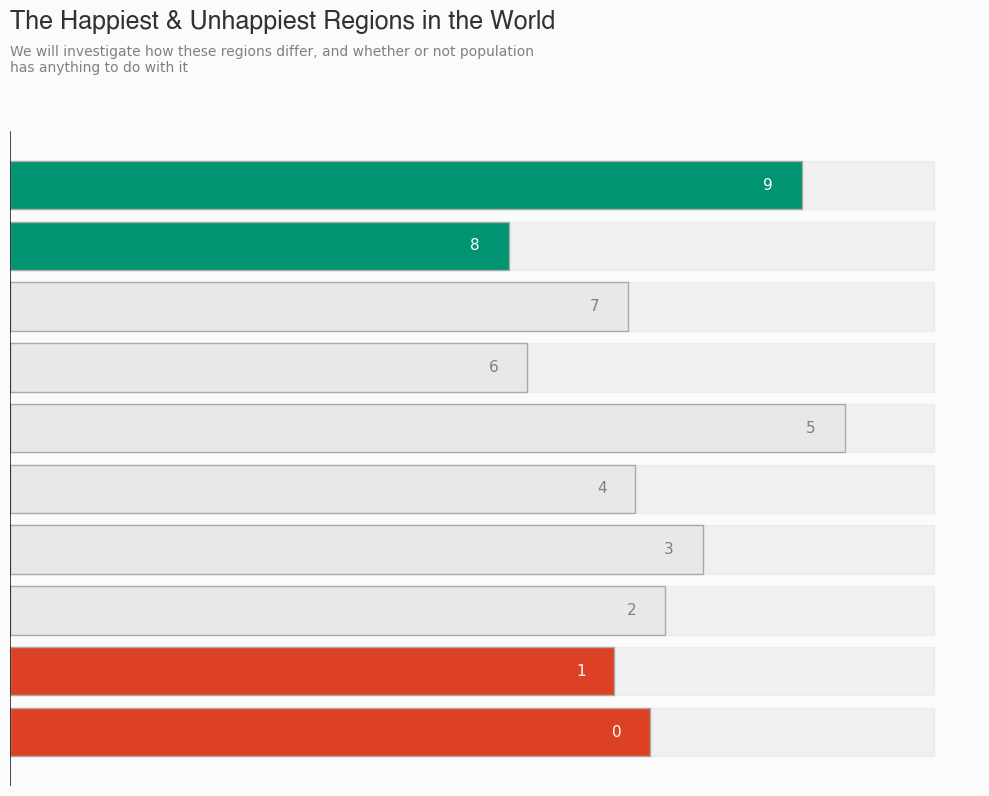

In [8]:
high_c = '#009473'
low_c = '#dd4124'

color_map = ['#e7e9e7' for _ in range(10)]
color_map[0] = color_map[1] =  high_c
color_map[8] = color_map[9] =  low_c

temp_color_map = color_map[::-1]

fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('#fbfbfb')
ax.set_facecolor('#fbfbfb')

base = ax.barh(y=data.index, width=8, color='lightgray', edgecolor='lightgray', alpha=.25)
bars = ax.barh(data.index, data['Life Ladder'], color=temp_color_map, edgecolor='darkgray')
ax.grid(axis='x', alpha=.3)
ax.set_axis_off()
ax.legend().set_visible(False)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.axvline(x=xmin, color='black', linewidth=0.5) # Add y-axis line

plt.text(s="The Happiest & Unhappiest Regions in the World", ha='left', x=xmin, y=ymax*1.17, fontsize=18, fontweight='bold', fontfamily='Helvetica',color='#323232')
plt.title("We will investigate how these regions differ, and whether or not population\nhas anything to do with it", loc='left', y=ymax*.109, fontsize=10, color='gray')  

for i, bar in enumerate(bars) : 
    x = bar.get_width() - .25
    y = bar.get_y() + bar.get_height() / 2
    if i > 1 and i < 8:
        ax.text(
            s=f"{data.index[i]}",
            va='center', ha='right', 
            x=x, y=y,
            color='gray',
            fontsize=11,
        )
    else:
        ax.text(
            s=f"{data.index[i]}",
            va='center', ha='right', 
            x=x, y=y,
            color='white',
            fontsize=11,
        )

plt.tight_layout()
plt.show()

ValueError: Could not interpret value `Regional Indicator` for `hue`. An entry with this name does not appear in `data`.

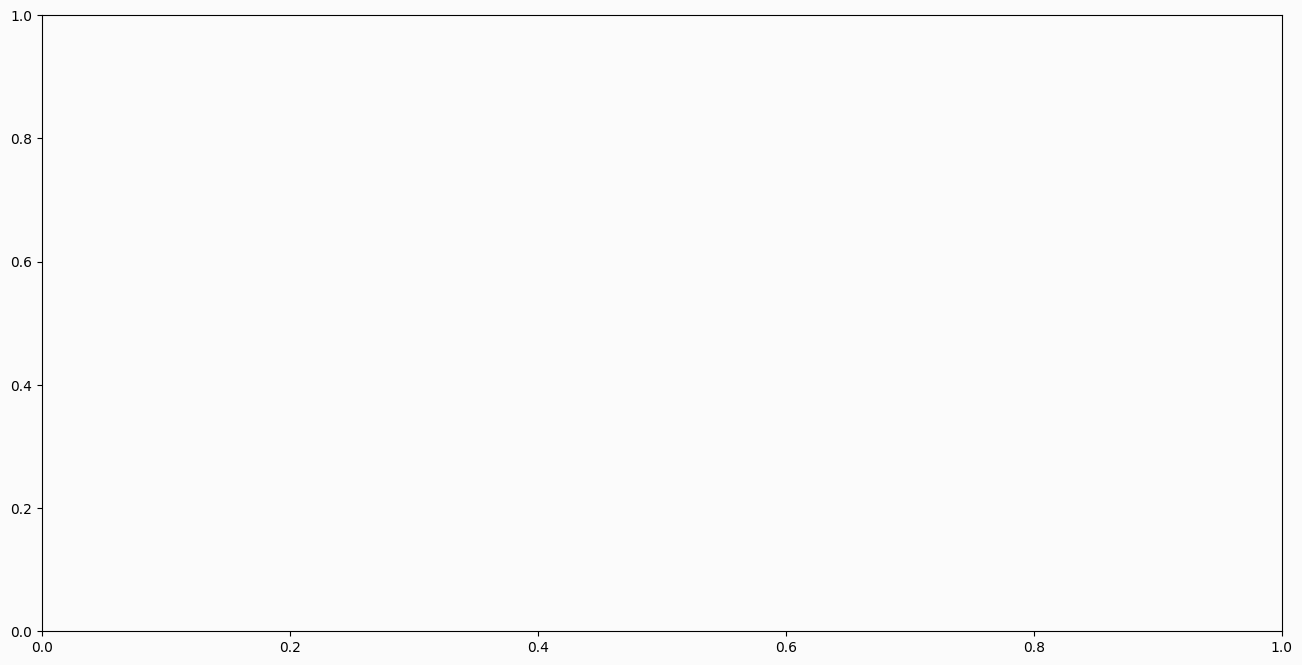

In [9]:
high_c = '#009473'
low_c = '#dd4124'

color_map = ['#e7e9e7' for _ in range(10)]
color_map[0] = color_map[1] =  high_c
color_map[8] = color_map[9] =  low_c

temp_color_map = color_map[::-1]

fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('#fbfbfb')
ax.set_facecolor('#fbfbfb')

sns.scatterplot(data=regional_score, x='Log GDP Per Capita', y='Life Ladder', hue='Regional Indicator', palette=color_map, s=1000, alpha=0.9, ec='black', linewidth=1.5, ax=ax, legend=False)

ax.set_xlabel("Log GDP Per Capita",fontfamily='monospace',loc='left',color='gray')
ax.set_ylabel("Happiness Index Score",fontfamily='monospace',loc='top',color='gray')
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)
    
Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart, Yend+0.45, 'The Relationship Between Economic Wealth and Life Satisfaction', fontsize=18, fontweight='bold', fontfamily='sansserif',color='#323232')
ax.text(Xstart, Yend+0.2, 'Countries with higher GDP per capita tend to have higher overall life satisfaction \namong citizens, as measured by the Life Ladder score.', fontsize=10, fontweight='light', fontfamily='monospace',color='gray')
    
for i, txt in enumerate(regional_score['Regional Indicator']):
    ax.annotate(txt, (regional_score['Log GDP Per Capita'][i]+0.075, regional_score['Life Ladder'][i]-0.025),fontfamily='monospace')

plt.show()